In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Dense, Flatten
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from tensorflow.keras import optimizers
from keras import models

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [73]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [74]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


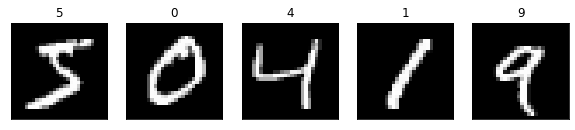

In [75]:
fig, axes = plt.subplots(ncols=5, sharex=False, 
    sharey=True, figsize=(10, 4))
for i in range(5):
    axes[i].set_title(y_train[i])
    axes[i].imshow(X_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

In [76]:
# Convert y_train into one-hot format
temp = []
for i in range(len(y_train)):
    temp.append(to_categorical(y_train[i], num_classes=10))
y_train = np.array(temp)
# Convert y_test into one-hot format
temp = []
for i in range(len(y_test)):    
    temp.append(to_categorical(y_test[i], num_classes=10))
y_test = np.array(temp)

In [77]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [78]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

1. Neural Network with 1 Hidden Layer

In [79]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(100, activation='relu', name = "Hidden_Layer"))
model.add(Dense(10, activation='softmax', name = "Output_Layer"))

In [80]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_Layer (Dense)         (None, 100)               78500     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(learning_rate=learning_rate)

In [82]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['acc'])

In [83]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs)

Epoch 1/20
600/600 [==============================] - 2s 3ms/step - loss: 41.6411 - acc: 0.4239
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 1.1534 - acc: 0.6249
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 1.1593 - acc: 0.6161
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 1.0454 - acc: 0.6466
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9445 - acc: 0.6768
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 1.0311 - acc: 0.6525
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9823 - acc: 0.6657
Epoch 8/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9774 - acc: 0.6671
Epoch 9/20
600/600 [==============================] - 2s 3ms/step - loss: 0.9398 - acc: 0.6723
Epoch 10/20
600/600 [==============================] - 2s 3ms/step - loss: 0.8765 - acc: 0.7192
Epoch 11/20
600/600 [===========================

In [84]:
from sklearn.metrics import accuracy_score
y_train_labels=np.argmax(y_train, axis=1)
y_test_labels=np.argmax(y_test, axis=1)

y_pred_train = np.argmax(model.predict(X_train), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)
print('Training accuracy:', 100*accuracy_score(y_train_labels, y_pred_train))
print('Testing accuracy:', 100*accuracy_score(y_test_labels, y_pred_test))

Training accuracy: 76.86333333333333
Testing accuracy: 76.33


Text(0, 0.5, 'Accuracy')

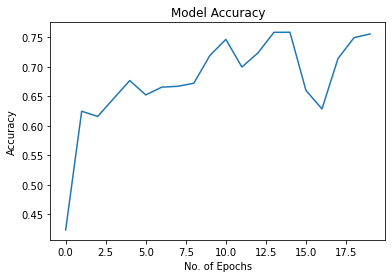

In [85]:
plt.figure()
plt.plot(history1.history['acc'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

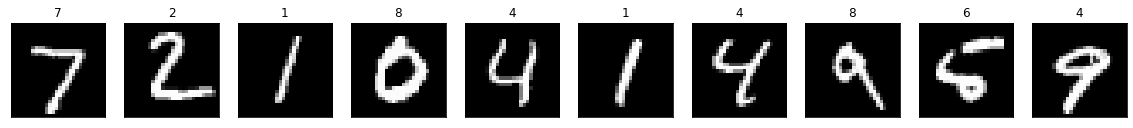

In [86]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_pred_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

2. Neural Network with 10 hidden layers


In [87]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_1"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_2"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_3"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_4"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_5"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_6"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_7"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_8"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_9"))
model.add(Dense(10, activation='relu', name = "Hidden_Layer_10"))
model.add(Dense(10, activation='softmax', name = "Output_Layer"))

In [88]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 10)                7850      
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 10)                110       
_________________________________________________________________
Hidden_Layer_3 (Dense)       (None, 10)                110       
_________________________________________________________________
Hidden_Layer_4 (Dense)       (None, 10)                110       
_________________________________________________________________
Hidden_Layer_5 (Dense)       (None, 10)                110       
_________________________________________________________________
Hidden_Layer_6 (Dense)       (None, 10)               

In [89]:
# Hyperparameters
learning_rate = 0.1
training_epochs = 20
batch_size = 100
sgd = optimizers.SGD(learning_rate=learning_rate)

In [90]:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd',
              metrics=['acc'])

In [91]:
history1 = model.fit(X_train, y_train,
                     batch_size = batch_size,
                     epochs = training_epochs)

Epoch 1/20
600/600 [==============================] - 2s 2ms/step - loss: 1.8331 - acc: 0.2475
Epoch 2/20
600/600 [==============================] - 1s 2ms/step - loss: 1.4807 - acc: 0.3981
Epoch 3/20
600/600 [==============================] - 1s 2ms/step - loss: 1.2025 - acc: 0.5279
Epoch 4/20
600/600 [==============================] - 1s 2ms/step - loss: 1.0844 - acc: 0.5903
Epoch 5/20
600/600 [==============================] - 1s 2ms/step - loss: 0.8385 - acc: 0.7198
Epoch 6/20
600/600 [==============================] - 1s 2ms/step - loss: 0.7021 - acc: 0.7756
Epoch 7/20
600/600 [==============================] - 1s 2ms/step - loss: 0.6422 - acc: 0.8005
Epoch 8/20
600/600 [==============================] - 1s 2ms/step - loss: 0.6120 - acc: 0.8151
Epoch 9/20
600/600 [==============================] - 1s 2ms/step - loss: 0.5667 - acc: 0.8381
Epoch 10/20
600/600 [==============================] - 1s 2ms/step - loss: 0.5112 - acc: 0.8564
Epoch 11/20
600/600 [============================

In [92]:
from sklearn.metrics import accuracy_score
y_train_labels=np.argmax(y_train, axis=1)
y_test_labels=np.argmax(y_test, axis=1)

y_pred_train = np.argmax(model.predict(X_train), axis=-1)
y_pred_test = np.argmax(model.predict(X_test), axis=-1)
print('Training accuracy:', 100*accuracy_score(y_train_labels, y_pred_train))
print('Testing accuracy:', 100*accuracy_score(y_test_labels, y_pred_test))

Training accuracy: 89.96
Testing accuracy: 89.46


Text(0, 0.5, 'Accuracy')

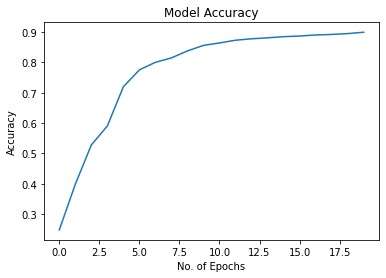

In [93]:
plt.figure()
plt.plot(history1.history['acc'])
plt.title('Model Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')

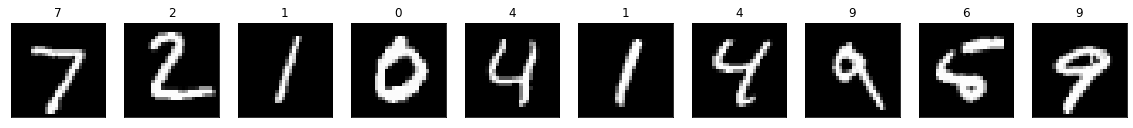

In [94]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(y_pred_test[i])
    axes[i].imshow(X_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

3. Training K Nearest Neighbour using features from Hidden Layers

In [95]:
layer_outputs = [layer.output for layer in model.layers] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [96]:
activations_train = activation_model.predict(X_train) 
activations_test = activation_model.predict(X_test) 

In [97]:
#Using features from Hidden Layer 5
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(activations_train[6], y_train)
knn_pred_train = knn.predict(activations_train[6])
knn_pred_test = knn.predict(activations_test[6])
print('Training accuracy from 5th hideden layer:', 100*accuracy_score(y_train, knn_pred_train))
print('Testing accuracy from 5th hidden layer:',100*accuracy_score(y_test, knn_pred_test) )

Training accuracy from 5th hideden layer: 88.89166666666667
Testing accuracy from 5th hidden layer: 87.74


In [98]:
#Using features from Hidden Layer 7
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(activations_train[8], y_train)
knn_pred_train = knn.predict(activations_train[8])
knn_pred_test = knn.predict(activations_test[8])
print('Training accuracy from 5th hideden layer:', 100*accuracy_score(y_train, knn_pred_train))
print('Testing accuracy from 5th hidden layer:',100*accuracy_score(y_test, knn_pred_test) )

Training accuracy from 5th hideden layer: 88.64999999999999
Testing accuracy from 5th hidden layer: 87.69


In [70]:
#Using features from Hidden Layer 10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(activations_train[11], y_train)
knn_pred_train = knn.predict(activations_train[11])
knn_pred_test = knn.predict(activations_test[11])
print('Training accuracy from 5th hideden layer:', 100*accuracy_score(y_train, knn_pred_train))
print('Testing accuracy from 5th hidden layer:',100*accuracy_score(y_test, knn_pred_test) )

Training accuracy from 5th hideden layer: 80.78166666666667
Testing accuracy from 5th hidden layer: 78.91
